In [62]:
!pip install tensorflow

In [63]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




import warnings

warnings.filterwarnings('ignore')

In [64]:
# some global variables

RANDOM_STATE = 24
np.random.RandomState(seed=RANDOM_STATE)

TEST_SIZE = 0.2

# Set the plotting parameters
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15,4),
          'axes.labelsize' : 'medium',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
          #'text.usetex':True,
          #'text.latex.unicode':True
          }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm

plt.style.use('seaborn-v0_8-darkgrid')
#plt.style.use('ggplot')

**Load Data**

In [65]:
data_df = pd.read_csv('breast_cancer_mod.csv')

In [66]:
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
3,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [67]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [68]:
data_df['target'].value_counts()

,count
target,
1,357
0,212


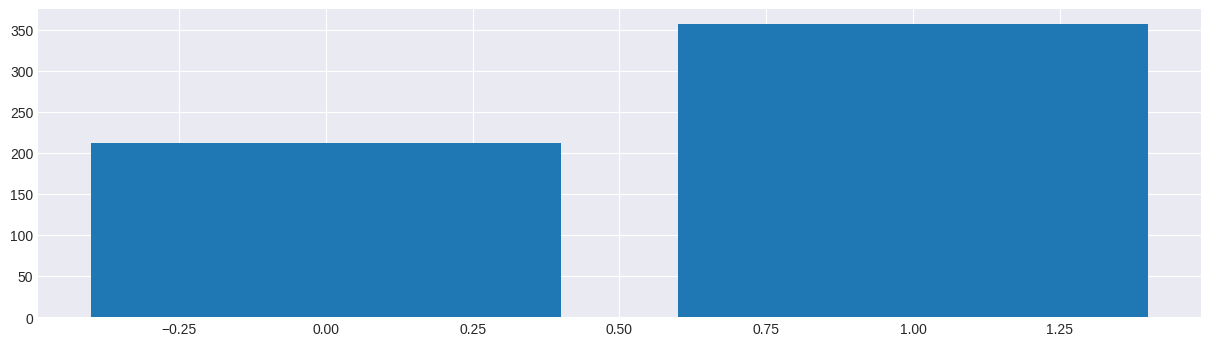

In [69]:
labels = ['malignant', 'benign']

fig,ax = plt.subplots()

ax.bar(data_df['target'].value_counts().index,
       data_df['target'].value_counts().values);

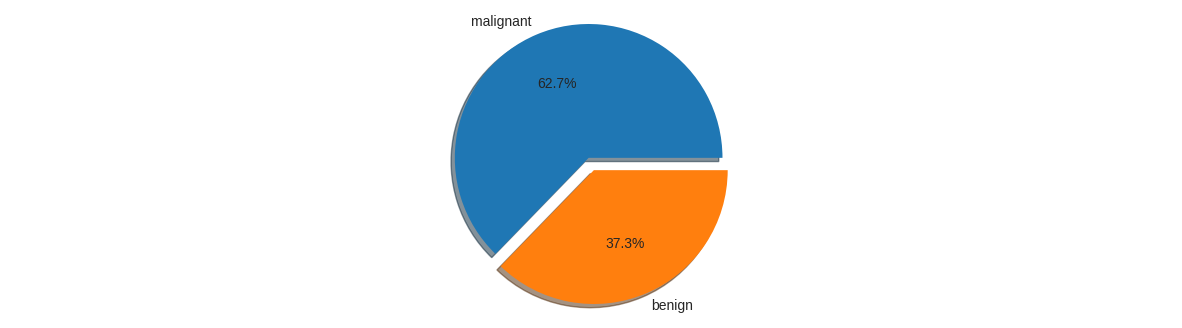

In [70]:
fig, ax = plt.subplots()

explode= (0, 0.1) # explode second slice

ax.pie(data_df['target'].value_counts(),
       explode=explode,
       labels= labels,
       autopct= '%1.1f%%',
       shadow= True,
       startangle=0)
ax.axis('equal')
plt.show()

**Split Data in Test Train**

In [71]:
features_df = data_df.drop('target', axis= 1)
labels = data_df['target']

In [72]:
X_train, X_test, y_train, y_test= train_test_split(features_df, labels, test_size= TEST_SIZE, stratify=labels, random_state=RANDOM_STATE)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [74]:
X_train['total']= X_train.astype(np.int16).sum(axis=1)
X_train['target']= y_train
X_train.sort_values('total', inplace=True)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
6,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,1,15,0


In [75]:
X_train.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
334,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
488,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
556,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
550,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
345,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1


In [76]:
X_test['total']= X_test.fillna(0).astype(np.int16).sum(axis=1)
X_test['target']= y_test
X_test.sort_values('total', inplace=True)
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
12,0,0,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,16,0
18,1,1,1,1,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,18,0
35,0,1,0,0,1,1,0,0,1,1,...,0,0,0,1,1,0,1,1,20,0


In [77]:
accuracy = {}
for b in range(X_train.shape[1]):  # looping over the columns
  X_train['pred'] = X_train['total'] >= b # comparing with b to get output
  accuracy[b]= accuracy_score(y_true=X_train['target'], y_pred=X_train['pred'])

accuracy


{0: 0.6263736263736264,
 1: 0.6263736263736264,
 2: 0.6263736263736264,
 3: 0.6263736263736264,
 4: 0.6263736263736264,
 5: 0.6263736263736264,
 6: 0.6263736263736264,
 7: 0.6263736263736264,
 8: 0.6263736263736264,
 9: 0.6263736263736264,
 10: 0.6263736263736264,
 11: 0.6263736263736264,
 12: 0.6263736263736264,
 13: 0.6285714285714286,
 14: 0.6329670329670329,
 15: 0.6329670329670329,
 16: 0.6417582417582418,
 17: 0.6505494505494506,
 18: 0.6593406593406593,
 19: 0.6637362637362637,
 20: 0.6725274725274726,
 21: 0.6901098901098901,
 22: 0.7098901098901099,
 23: 0.734065934065934,
 24: 0.7692307692307693,
 25: 0.8021978021978022,
 26: 0.8307692307692308,
 27: 0.8505494505494505,
 28: 0.8483516483516483,
 29: 0.8241758241758241,
 30: 0.7472527472527473,
 31: 0.37362637362637363}

In [78]:
best_b = max(accuracy, key = accuracy.get)
best_b

27

In [79]:
accuracy[27]

0.8505494505494505

**On Testing Data**

In [80]:
X_test['pred'] = X_test['total'] >= best_b
accuracy_score(y_true=X_test['target'], y_pred=X_test['pred'])

0.868421052631579